In [1]:
from services.load_dataset import load_data
from services.modeling import create_sequences, apply_smote, train_and_plot_results
import pickle

X_train, X_val, X_test, y_train, y_val, y_test  = load_data(data_folder='data')

X_train_seq_datasets_original = []
y_train_seq_datasets_original = []
X_train_seq_datasets = []
y_train_seq_datasets = []

best_hp = pickle.load(open('model/best_hp.pkl', 'rb'))

# Vary the X_train and y_train size to see how it affects the privacy
# Take last 90%, 80%, ... 10% of the dataset
for i in range(1, 11):
    X_train_ds = X_train[:int(len(X_train) * i / 10)]
    y_train_ds = y_train[:int(len(y_train) * i / 10)]
    X_train_seq_original, y_train_seq_original = create_sequences(X_train_ds, y_train_ds, best_hp['sequence_length'])
    X_train_seq, y_train_seq = apply_smote(X_train_seq_original, y_train_seq_original, sampling_strategy=0.25)

    X_train_seq_datasets_original.append(X_train_seq_original)
    y_train_seq_datasets_original.append(y_train_seq_original)
    X_train_seq_datasets.append(X_train_seq)
    y_train_seq_datasets.append(y_train_seq)
    

X_train_seq, y_train_seq = X_train_seq_datasets[-1], y_train_seq_datasets[-1]
X_val_seq, y_val_seq = create_sequences(X_val, y_val, best_hp['sequence_length'])
X_test_seq, y_test_seq = create_sequences(X_test, y_test, best_hp['sequence_length'])

c:\Users\Albert Salles\anaconda3\envs\ds\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
c:\Users\Albert Salles\anaconda3\envs\ds\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
c:\Users\Albert Salles\anaconda3\envs\ds\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
c:\Users\Albert Salles\anaconda3\e

In [2]:
import pandas as pd
# count the number of classes and percentages in the training dataset
print('Number of classes in the training dataset')
print(pd.Series(y_train).value_counts())
print(f'Percentage of class 0: {pd.Series(y_train).value_counts()[0] / len(y_train) * 100:.2f}%')
print(f'Percentage of class 1: {pd.Series(y_train).value_counts()[1] / len(y_train) * 100:.2f}%')
print('Number of classes in the validation dataset')
print(pd.Series(y_val).value_counts())
print(f'Percentage of class 0: {pd.Series(y_val).value_counts()[0] / len(y_val) * 100:.2f}%')
print(f'Percentage of class 1: {pd.Series(y_val).value_counts()[1] / len(y_val) * 100:.2f}%')
print('Number of classes in the test dataset')
print(pd.Series(y_test).value_counts())
print(f'Percentage of class 0: {pd.Series(y_test).value_counts()[0] / len(y_test) * 100:.2f}%')
print(f'Percentage of class 1: {pd.Series(y_test).value_counts()[1] / len(y_test) * 100:.2f}%')

print('Number of classes in the training dataset after applying SMOTE')
print(pd.Series(y_train_seq).value_counts())
print(f'Percentage of class 0: {pd.Series(y_train_seq).value_counts()[0] / len(y_train_seq) * 100:.2f}%')
print(f'Percentage of class 1: {pd.Series(y_train_seq).value_counts()[1] / len(y_train_seq) * 100:.2f}%')

Number of classes in the training dataset
0.0    157515
1.0       353
Name: count, dtype: int64
Percentage of class 0: 99.78%
Percentage of class 1: 0.22%
Number of classes in the validation dataset
0.0    50743
1.0       40
Name: count, dtype: int64
Percentage of class 0: 99.92%
Percentage of class 1: 0.08%
Number of classes in the test dataset
0.0    76057
1.0       99
Name: count, dtype: int64
Percentage of class 0: 99.87%
Percentage of class 1: 0.13%
Number of classes in the training dataset after applying SMOTE
0    151967
1     37991
Name: count, dtype: int64
Percentage of class 0: 80.00%
Percentage of class 1: 20.00%


X_train_seq shape: (18191, 20, 29)
y_train_seq shape: (18191,)
X_val_seq shape: (50764, 20, 29)
y_val_seq shape: (50764,)

Epoch 1/10


523/569 [==========================>...] - ETA: 0s - loss: 0.1665 - accuracy: 0.6037 - precision: 0.2442 - recall: 0.4633 - auc: 0.5779

569/569 [==============================] - 31s 38ms/step - loss: 0.1659 - accuracy: 0.6099 - precision: 0.2452 - recall: 0.4574 - auc: 0.5778 - val_loss: 0.1946 - val_accuracy: 0.2462 - val_precision: 0.0151 - val_recall: 0.7908 - val_auc: 0.5455
Epoch 2/10
569/569 [==============================] - 16s 29ms/step - loss: 0.1539 - accuracy: 0.6990 - precision: 0.2675 - recall: 0.2905 - auc: 0.5821 - val_loss: 0.1913 - val_accuracy: 0.2925 - val_precision: 0.0158 - val_recall: 0.7733 - val_auc: 0.5665
Epoch 3/10
569/569 [==============================] - 17s 30ms/step - loss: 0.1453 - accuracy: 0.7409 - precision: 0.2954 - recall: 0.2136 - auc: 0.5923 - val_loss: 0.1871 - val_accuracy: 0.3520 - val_precision: 0.0168 - val_recall: 0.7530 - val_auc: 0.5902
Epoch 4/10
569/569 [==============================] - 16s 29ms/step - loss: 0.1387 - accuracy: 0.7628 - precision: 0.3320 - recall: 0.1836 - auc: 0.6111 - val_loss: 0.1819 - val_accuracy: 0.4226 - val_precision: 0.0182 - val_recall: 0.73

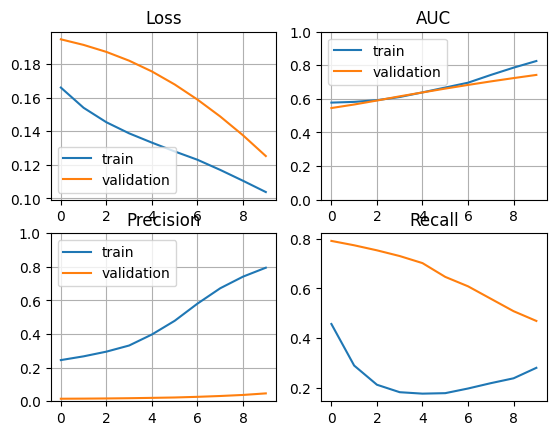

2380/2380 [==============================] - 20s 8ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.84      0.91     74280
           1       0.08      0.60      0.15      1857

    accuracy                           0.83     76137
   macro avg       0.54      0.72      0.53     76137
weighted avg       0.97      0.83      0.89     76137

Confusion Matrix:


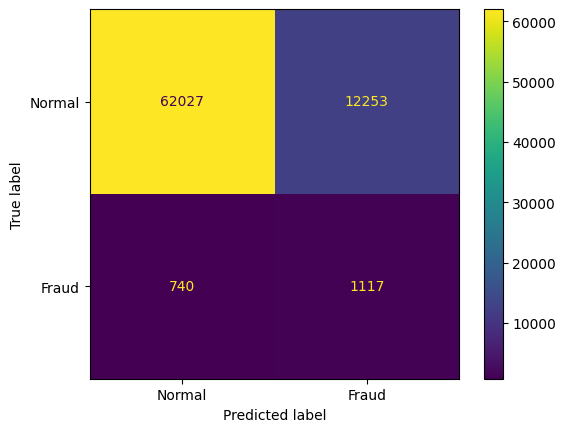

X_train_seq shape: (37192, 20, 29)
y_train_seq shape: (37192,)
X_val_seq shape: (50764, 20, 29)
y_val_seq shape: (50764,)
Epoch 1/10
1163/1163 [==============================] - 29s 22ms/step - loss: 0.1712 - accuracy: 0.5939 - precision: 0.2267 - recall: 0.4273 - auc: 0.5363 - val_loss: 0.1430 - val_accuracy: 0.9308 - val_precision: 0.0144 - val_recall: 0.0553 - val_auc: 0.5053
Epoch 2/10
1163/1163 [==============================] - 24s 21ms/step - loss: 0.1577 - accuracy: 0.6997 - precision: 0.2661 - recall: 0.2853 - auc: 0.5670 - val_loss: 0.1298 - val_accuracy: 0.9663 - val_precision: 0.0111 - val_recall: 0.0148 - val_auc: 0.5507
Epoch 3/10
1163/1163 [==============================] - 24s 21ms/step - loss: 0.1462 - accuracy: 0.7631 - precision: 0.3371 - recall: 0.1909 - auc: 0.6055 - val_loss: 0.1136 - val_accuracy: 0.9779 - val_precision: 0.0026 - val_recall: 0.0013 - val_auc: 0.5912
Epoch 4/10
1163/1163 [==============================] - 24s 21ms/step - loss: 0.1344 - accuracy: 0

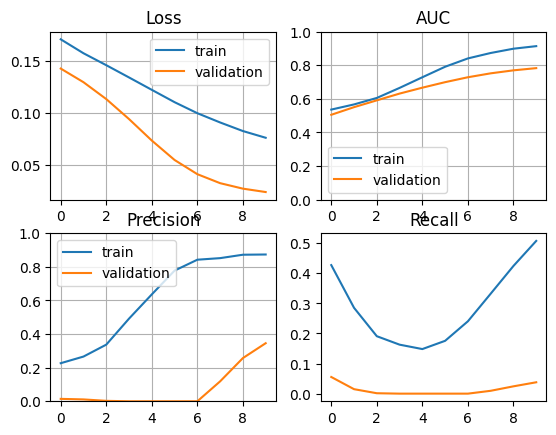

2380/2380 [==============================] - 14s 5ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     74280
           1       0.73      0.14      0.24      1857

    accuracy                           0.98     76137
   macro avg       0.85      0.57      0.61     76137
weighted avg       0.97      0.98      0.97     76137

Confusion Matrix:


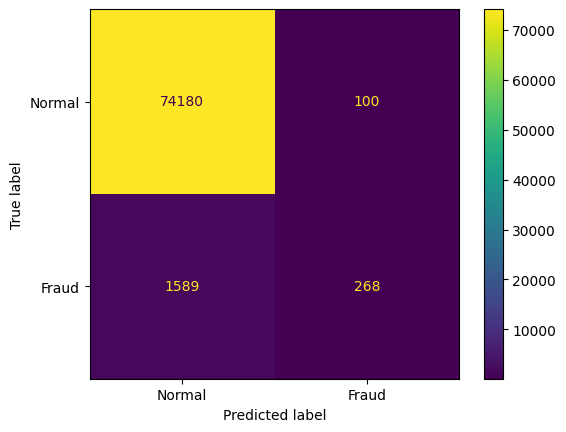

X_train_seq shape: (55928, 20, 29)
y_train_seq shape: (55928,)
X_val_seq shape: (50764, 20, 29)
y_val_seq shape: (50764,)
Epoch 1/10
1748/1748 [==============================] - 38s 19ms/step - loss: 0.1592 - accuracy: 0.6902 - precision: 0.3321 - recall: 0.5430 - auc: 0.6846 - val_loss: 0.1485 - val_accuracy: 0.8204 - val_precision: 0.0311 - val_recall: 0.3752 - val_auc: 0.6556
Epoch 2/10
1748/1748 [==============================] - 33s 19ms/step - loss: 0.1346 - accuracy: 0.8160 - precision: 0.5575 - recall: 0.3883 - auc: 0.7668 - val_loss: 0.1131 - val_accuracy: 0.9469 - val_precision: 0.0611 - val_recall: 0.1835 - val_auc: 0.6965
Epoch 3/10
1748/1748 [==============================] - 33s 19ms/step - loss: 0.1063 - accuracy: 0.8532 - precision: 0.8228 - recall: 0.3388 - auc: 0.8467 - val_loss: 0.0717 - val_accuracy: 0.9737 - val_precision: 0.1102 - val_recall: 0.1134 - val_auc: 0.7376
Epoch 4/10
1748/1748 [==============================] - 33s 19ms/step - loss: 0.0862 - accuracy: 0

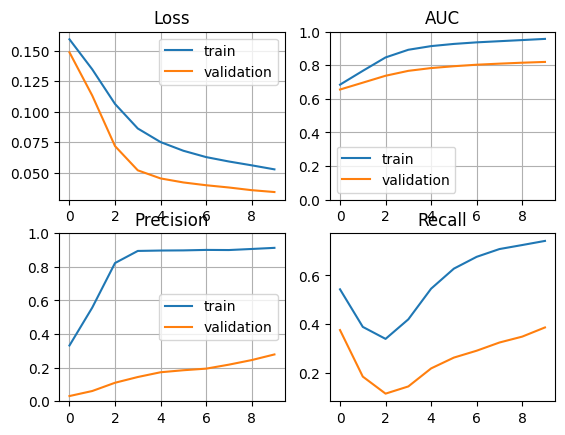

2380/2380 [==============================] - 13s 5ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98     74280
           1       0.39      0.57      0.46      1857

    accuracy                           0.97     76137
   macro avg       0.69      0.77      0.72     76137
weighted avg       0.97      0.97      0.97     76137

Confusion Matrix:


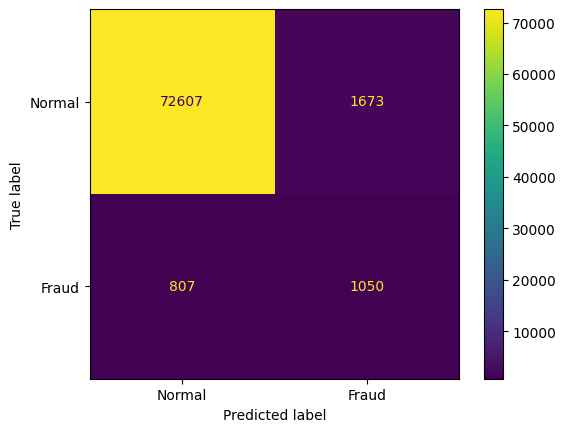

X_train_seq shape: (75212, 20, 29)
y_train_seq shape: (75212,)
X_val_seq shape: (50764, 20, 29)
y_val_seq shape: (50764,)
Epoch 1/10
2351/2351 [==============================] - 46s 18ms/step - loss: 0.1659 - accuracy: 0.6073 - precision: 0.2134 - recall: 0.3588 - auc: 0.5158 - val_loss: 0.1454 - val_accuracy: 0.9051 - val_precision: 0.0332 - val_recall: 0.1957 - val_auc: 0.6020
Epoch 2/10
2351/2351 [==============================] - 41s 18ms/step - loss: 0.1339 - accuracy: 0.7996 - precision: 0.4966 - recall: 0.1622 - auc: 0.6932 - val_loss: 0.1013 - val_accuracy: 0.9774 - val_precision: 0.0467 - val_recall: 0.0283 - val_auc: 0.6704
Epoch 3/10
2351/2351 [==============================] - 42s 18ms/step - loss: 0.1034 - accuracy: 0.8326 - precision: 0.8568 - recall: 0.1957 - auc: 0.8397 - val_loss: 0.0692 - val_accuracy: 0.9801 - val_precision: 0.1455 - val_recall: 0.0742 - val_auc: 0.7354
Epoch 4/10
2351/2351 [==============================] - 41s 18ms/step - loss: 0.0820 - accuracy: 0

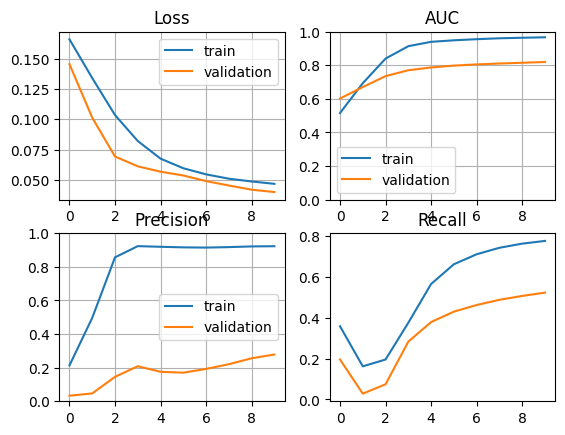

2380/2380 [==============================] - 13s 5ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98     74280
           1       0.37      0.65      0.47      1857

    accuracy                           0.96     76137
   macro avg       0.68      0.81      0.73     76137
weighted avg       0.98      0.96      0.97     76137

Confusion Matrix:


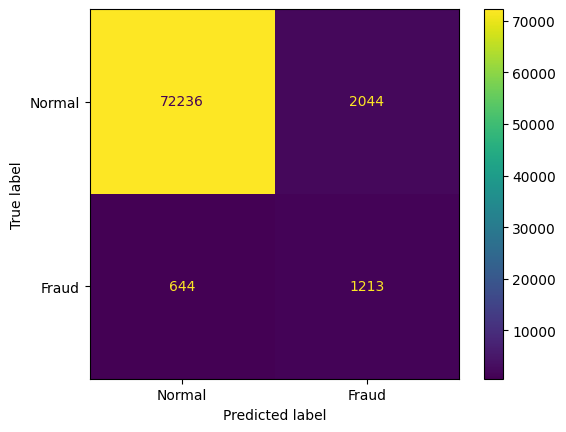

X_train_seq shape: (94283, 20, 29)
y_train_seq shape: (94283,)
X_val_seq shape: (50764, 20, 29)
y_val_seq shape: (50764,)
Epoch 1/10
2947/2947 [==============================] - 54s 17ms/step - loss: 0.1600 - accuracy: 0.6822 - precision: 0.2841 - recall: 0.3878 - auc: 0.6136 - val_loss: 0.1284 - val_accuracy: 0.9813 - val_precision: 0.1069 - val_recall: 0.0378 - val_auc: 0.6115
Epoch 2/10
2947/2947 [==============================] - 50s 17ms/step - loss: 0.1183 - accuracy: 0.8208 - precision: 0.6787 - recall: 0.1976 - auc: 0.8002 - val_loss: 0.0612 - val_accuracy: 0.9856 - val_precision: 0.6818 - val_recall: 0.0202 - val_auc: 0.6871
Epoch 3/10
2947/2947 [==============================] - 51s 17ms/step - loss: 0.0837 - accuracy: 0.8659 - precision: 0.9260 - recall: 0.3579 - auc: 0.9120 - val_loss: 0.0381 - val_accuracy: 0.9857 - val_precision: 0.5691 - val_recall: 0.0945 - val_auc: 0.7374
Epoch 4/10
2947/2947 [==============================] - 51s 17ms/step - loss: 0.0671 - accuracy: 0

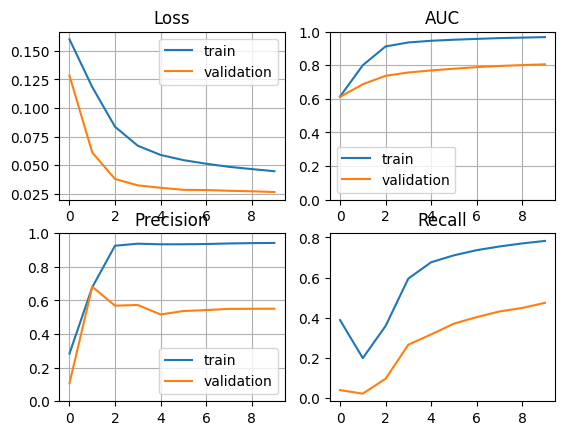

2380/2380 [==============================] - 13s 5ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     74280
           1       0.52      0.63      0.57      1857

    accuracy                           0.98     76137
   macro avg       0.76      0.81      0.78     76137
weighted avg       0.98      0.98      0.98     76137

Confusion Matrix:


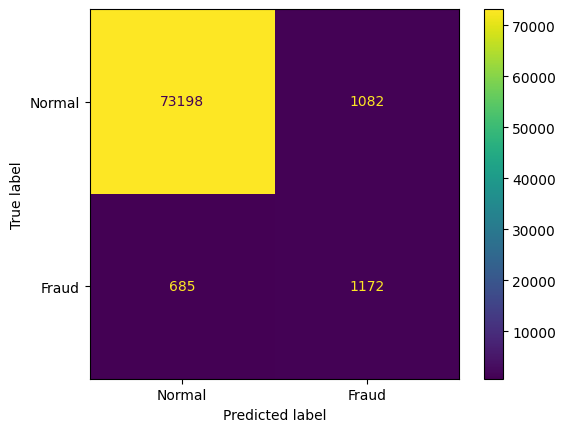

X_train_seq shape: (113385, 20, 29)
y_train_seq shape: (113385,)
X_val_seq shape: (50764, 20, 29)
y_val_seq shape: (50764,)
Epoch 1/10
3544/3544 [==============================] - 62s 16ms/step - loss: 0.1507 - accuracy: 0.7248 - precision: 0.3346 - recall: 0.3802 - auc: 0.6727 - val_loss: 0.0846 - val_accuracy: 0.9708 - val_precision: 0.0292 - val_recall: 0.0310 - val_auc: 0.6286
Epoch 2/10
3544/3544 [==============================] - 58s 16ms/step - loss: 0.1058 - accuracy: 0.8213 - precision: 0.6285 - recall: 0.2610 - auc: 0.8248 - val_loss: 0.0365 - val_accuracy: 0.9851 - val_precision: 0.2581 - val_recall: 0.0108 - val_auc: 0.7286
Epoch 3/10
3544/3544 [==============================] - 58s 16ms/step - loss: 0.0788 - accuracy: 0.8834 - precision: 0.9343 - recall: 0.4484 - auc: 0.9147 - val_loss: 0.0276 - val_accuracy: 0.9861 - val_precision: 0.6259 - val_recall: 0.1174 - val_auc: 0.7607
Epoch 4/10
3544/3544 [==============================] - 59s 17ms/step - loss: 0.0648 - accuracy:

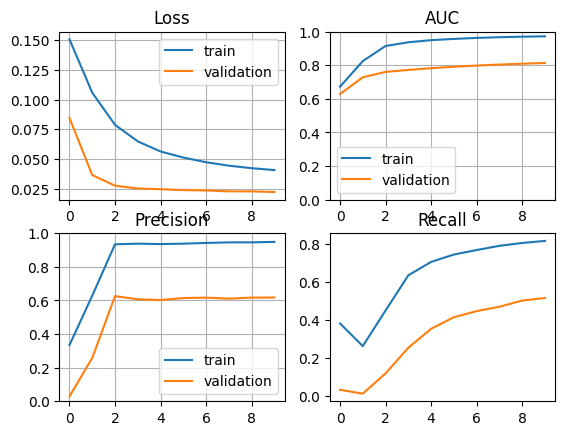

2380/2380 [==============================] - 13s 5ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     74280
           1       0.80      0.63      0.70      1857

    accuracy                           0.99     76137
   macro avg       0.89      0.81      0.85     76137
weighted avg       0.99      0.99      0.99     76137

Confusion Matrix:


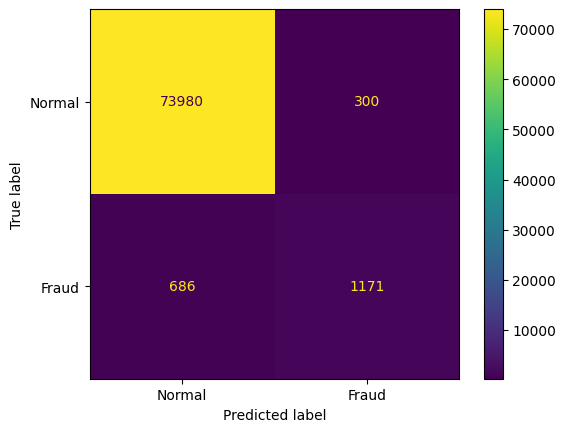

X_train_seq shape: (132686, 20, 29)
y_train_seq shape: (132686,)
X_val_seq shape: (50764, 20, 29)
y_val_seq shape: (50764,)
Epoch 1/10
4147/4147 [==============================] - 71s 16ms/step - loss: 0.1583 - accuracy: 0.6598 - precision: 0.1999 - recall: 0.2335 - auc: 0.5292 - val_loss: 0.1064 - val_accuracy: 0.9806 - val_precision: 0.0519 - val_recall: 0.0189 - val_auc: 0.5534
Epoch 2/10
4147/4147 [==============================] - 67s 16ms/step - loss: 0.1123 - accuracy: 0.8127 - precision: 0.6126 - recall: 0.1725 - auc: 0.7781 - val_loss: 0.0492 - val_accuracy: 0.9854 - val_precision: 0.4643 - val_recall: 0.0175 - val_auc: 0.6634
Epoch 3/10
4147/4147 [==============================] - 68s 16ms/step - loss: 0.0826 - accuracy: 0.8779 - precision: 0.9190 - recall: 0.4273 - auc: 0.8983 - val_loss: 0.0321 - val_accuracy: 0.9863 - val_precision: 0.6328 - val_recall: 0.1511 - val_auc: 0.7214
Epoch 4/10
4147/4147 [==============================] - 68s 16ms/step - loss: 0.0660 - accuracy:

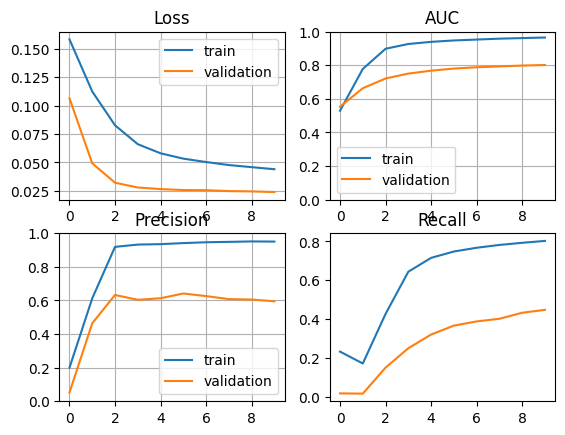

2380/2380 [==============================] - 13s 5ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     74280
           1       0.67      0.64      0.65      1857

    accuracy                           0.98     76137
   macro avg       0.83      0.82      0.82     76137
weighted avg       0.98      0.98      0.98     76137

Confusion Matrix:


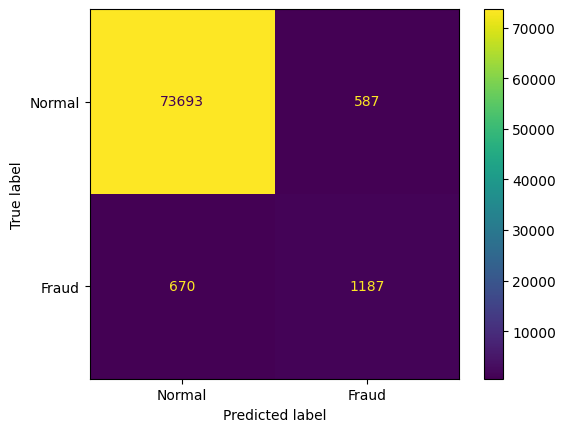

X_train_seq shape: (151895, 20, 29)
y_train_seq shape: (151895,)
X_val_seq shape: (50764, 20, 29)
y_val_seq shape: (50764,)
Epoch 1/10
4747/4747 [==============================] - 80s 16ms/step - loss: 0.1450 - accuracy: 0.7290 - precision: 0.2662 - recall: 0.2020 - auc: 0.6010 - val_loss: 0.1149 - val_accuracy: 0.9393 - val_precision: 0.0605 - val_recall: 0.2173 - val_auc: 0.6666
Epoch 2/10
4747/4747 [==============================] - 76s 16ms/step - loss: 0.0965 - accuracy: 0.8474 - precision: 0.8836 - recall: 0.2730 - auc: 0.8518 - val_loss: 0.0758 - val_accuracy: 0.9455 - val_precision: 0.1185 - val_recall: 0.4251 - val_auc: 0.7718
Epoch 3/10
4747/4747 [==============================] - 76s 16ms/step - loss: 0.0716 - accuracy: 0.9099 - precision: 0.9336 - recall: 0.5916 - auc: 0.9142 - val_loss: 0.0570 - val_accuracy: 0.9560 - val_precision: 0.1661 - val_recall: 0.5007 - val_auc: 0.8018
Epoch 4/10
4747/4747 [==============================] - 77s 16ms/step - loss: 0.0613 - accuracy:

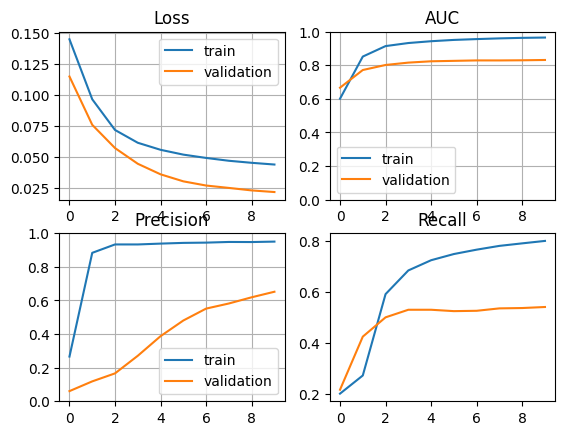

2380/2380 [==============================] - 14s 6ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     74280
           1       0.71      0.63      0.66      1857

    accuracy                           0.98     76137
   macro avg       0.85      0.81      0.83     76137
weighted avg       0.98      0.98      0.98     76137

Confusion Matrix:


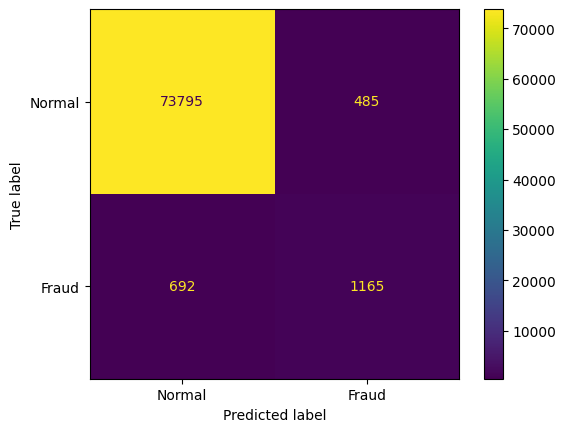

X_train_seq shape: (171475, 20, 29)
y_train_seq shape: (171475,)
X_val_seq shape: (50764, 20, 29)
y_val_seq shape: (50764,)
Epoch 1/10
5359/5359 [==============================] - 90s 16ms/step - loss: 0.1480 - accuracy: 0.7103 - precision: 0.2930 - recall: 0.3173 - auc: 0.6310 - val_loss: 0.0700 - val_accuracy: 0.9800 - val_precision: 0.0142 - val_recall: 0.0054 - val_auc: 0.6691
Epoch 2/10
5359/5359 [==============================] - 85s 16ms/step - loss: 0.0926 - accuracy: 0.8536 - precision: 0.8291 - recall: 0.3374 - auc: 0.8644 - val_loss: 0.0295 - val_accuracy: 0.9856 - val_precision: 0.5918 - val_recall: 0.0391 - val_auc: 0.7441
Epoch 3/10
5359/5359 [==============================] - 85s 16ms/step - loss: 0.0707 - accuracy: 0.9097 - precision: 0.9245 - recall: 0.5973 - auc: 0.9189 - val_loss: 0.0208 - val_accuracy: 0.9867 - val_precision: 0.7211 - val_recall: 0.1430 - val_auc: 0.7741
Epoch 4/10
5359/5359 [==============================] - 84s 16ms/step - loss: 0.0597 - accuracy:

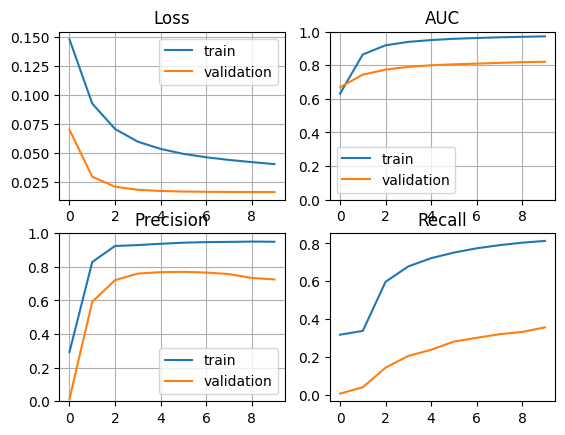

2380/2380 [==============================] - 13s 5ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     74280
           1       0.94      0.50      0.66      1857

    accuracy                           0.99     76137
   macro avg       0.96      0.75      0.82     76137
weighted avg       0.99      0.99      0.99     76137

Confusion Matrix:


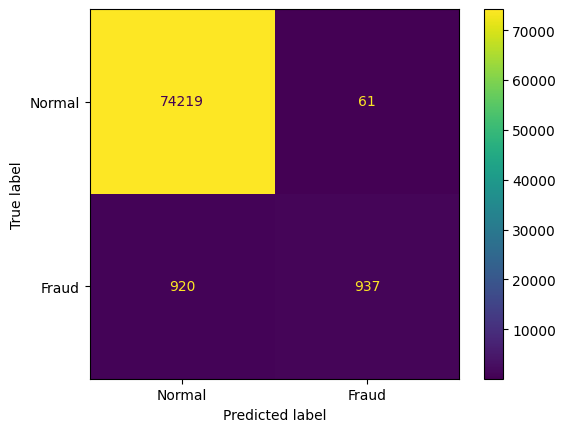

X_train_seq shape: (189958, 20, 29)
y_train_seq shape: (189958,)
X_val_seq shape: (50764, 20, 29)
y_val_seq shape: (50764,)
Epoch 1/10
5937/5937 [==============================] - 97s 16ms/step - loss: 0.1425 - accuracy: 0.7140 - precision: 0.2833 - recall: 0.2810 - auc: 0.6280 - val_loss: 0.0452 - val_accuracy: 0.9849 - val_precision: 0.1316 - val_recall: 0.0067 - val_auc: 0.7230
Epoch 2/10
5937/5937 [==============================] - 91s 15ms/step - loss: 0.0867 - accuracy: 0.8734 - precision: 0.8823 - recall: 0.4234 - auc: 0.8765 - val_loss: 0.0268 - val_accuracy: 0.9853 - val_precision: 0.4824 - val_recall: 0.1296 - val_auc: 0.7780
Epoch 3/10
5937/5937 [==============================] - 91s 15ms/step - loss: 0.0690 - accuracy: 0.9139 - precision: 0.9074 - recall: 0.6342 - auc: 0.9145 - val_loss: 0.0247 - val_accuracy: 0.9861 - val_precision: 0.5442 - val_recall: 0.2740 - val_auc: 0.7943
Epoch 4/10
5937/5937 [==============================] - 93s 16ms/step - loss: 0.0608 - accuracy:

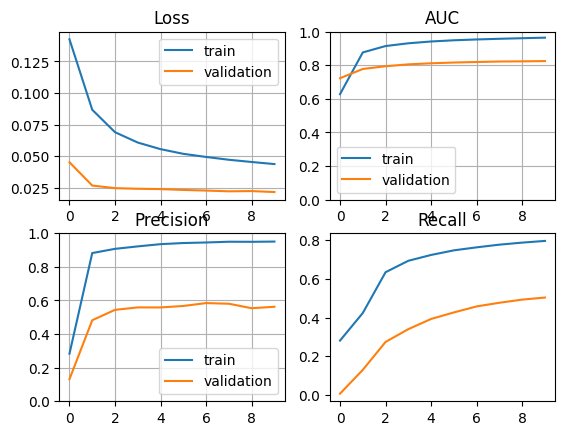

2380/2380 [==============================] - 13s 5ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     74280
           1       0.71      0.64      0.67      1857

    accuracy                           0.98     76137
   macro avg       0.85      0.81      0.83     76137
weighted avg       0.98      0.98      0.98     76137

Confusion Matrix:


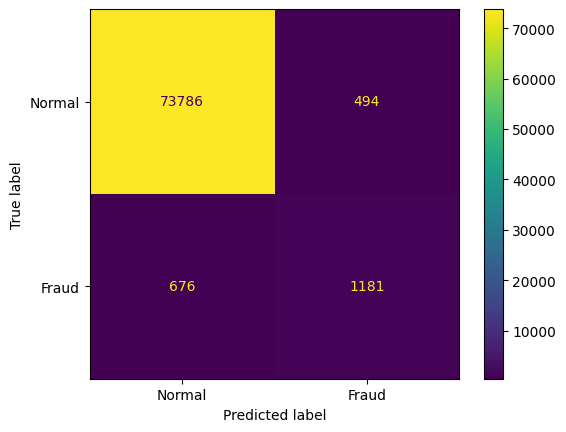

In [3]:
models = []
hists = []
for X_train_seq, y_train_seq in zip(X_train_seq_datasets, y_train_seq_datasets):
    print(f'X_train_seq shape: {X_train_seq.shape}')
    print(f'y_train_seq shape: {y_train_seq.shape}')
    print(f'X_val_seq shape: {X_val_seq.shape}')
    print(f'y_val_seq shape: {y_val_seq.shape}')
    model, hist = train_and_plot_results(X_train_seq, y_train_seq, X_test_seq, y_test_seq, best_hp, X_val=X_val_seq, y_val=y_val_seq)
    models.append(model)
    hists.append(hist)




2380/2380 [==============================] - 12s 5ms/step


c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: divide by zero encountered in divide
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:335: RuntimeWarning: divide by zero encountered in divide
  (self._z**2 * fnr * tnr) /
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: invalid value encountered in subtract
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: divide by zero encountered in divide
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy

  1/493 [..............................] - ETA: 16s

c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: divide by zero encountered in divide
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:335: RuntimeWarning: divide by zero encountered in divide
  (self._z**2 * fnr * tnr) /
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: invalid value encountered in subtract
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -


2380/2380 [==============================] - 12s 5ms/step


c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: divide by zero encountered in divide
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:335: RuntimeWarning: divide by zero encountered in divide
  (self._z**2 * fnr * tnr) /
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: invalid value encountered in subtract
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: divide by zero encountered in divide
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy

 12/493 [..............................] - ETA: 2s 

c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: divide by zero encountered in divide
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:335: RuntimeWarning: divide by zero encountered in divide
  (self._z**2 * fnr * tnr) /
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: invalid value encountered in subtract
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -


2380/2380 [==============================] - 12s 5ms/step


c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: divide by zero encountered in divide
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:335: RuntimeWarning: divide by zero encountered in divide
  (self._z**2 * fnr * tnr) /
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: invalid value encountered in subtract
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: divide by zero encountered in divide
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy

 11/493 [..............................] - ETA: 2s 

c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: divide by zero encountered in divide
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:335: RuntimeWarning: divide by zero encountered in divide
  (self._z**2 * fnr * tnr) /
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: invalid value encountered in subtract
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -


2380/2380 [==============================] - 15s 6ms/step


c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: divide by zero encountered in divide
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:335: RuntimeWarning: divide by zero encountered in divide
  (self._z**2 * fnr * tnr) /
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: invalid value encountered in subtract
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: divide by zero encountered in divide
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy

 15/493 [..............................] - ETA: 2s 

c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: divide by zero encountered in divide
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:335: RuntimeWarning: divide by zero encountered in divide
  (self._z**2 * fnr * tnr) /
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: invalid value encountered in subtract
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -


2380/2380 [==============================] - 12s 5ms/step


c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: divide by zero encountered in divide
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:335: RuntimeWarning: divide by zero encountered in divide
  (self._z**2 * fnr * tnr) /
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: invalid value encountered in subtract
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: divide by zero encountered in divide
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy

 13/493 [..............................] - ETA: 2s 

c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: divide by zero encountered in divide
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:335: RuntimeWarning: divide by zero encountered in divide
  (self._z**2 * fnr * tnr) /
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: invalid value encountered in subtract
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -


2380/2380 [==============================] - 12s 5ms/step


c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: divide by zero encountered in divide
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:335: RuntimeWarning: divide by zero encountered in divide
  (self._z**2 * fnr * tnr) /
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: invalid value encountered in subtract
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: divide by zero encountered in divide
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy

 16/493 [..............................] - ETA: 2s 

c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: divide by zero encountered in divide
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:335: RuntimeWarning: divide by zero encountered in divide
  (self._z**2 * fnr * tnr) /
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: invalid value encountered in subtract
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -


2380/2380 [==============================] - 13s 5ms/step


c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: divide by zero encountered in divide
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:335: RuntimeWarning: divide by zero encountered in divide
  (self._z**2 * fnr * tnr) /
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: invalid value encountered in subtract
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: divide by zero encountered in divide
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy

 14/493 [..............................] - ETA: 2s 

c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: divide by zero encountered in divide
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:335: RuntimeWarning: divide by zero encountered in divide
  (self._z**2 * fnr * tnr) /
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: invalid value encountered in subtract
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -


2380/2380 [==============================] - 12s 5ms/step


c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: divide by zero encountered in divide
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:335: RuntimeWarning: divide by zero encountered in divide
  (self._z**2 * fnr * tnr) /
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: invalid value encountered in subtract
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: divide by zero encountered in divide
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy

  9/493 [..............................] - ETA: 3s 

c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: divide by zero encountered in divide
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:335: RuntimeWarning: divide by zero encountered in divide
  (self._z**2 * fnr * tnr) /
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: invalid value encountered in subtract
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -


2380/2380 [==============================] - 12s 5ms/step


c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: divide by zero encountered in divide
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:335: RuntimeWarning: divide by zero encountered in divide
  (self._z**2 * fnr * tnr) /
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: invalid value encountered in subtract
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: divide by zero encountered in divide
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy

 10/493 [..............................] - ETA: 2s

c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: divide by zero encountered in divide
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:335: RuntimeWarning: divide by zero encountered in divide
  (self._z**2 * fnr * tnr) /
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: invalid value encountered in subtract
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -


2380/2380 [==============================] - 12s 5ms/step


c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: divide by zero encountered in divide
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:335: RuntimeWarning: divide by zero encountered in divide
  (self._z**2 * fnr * tnr) /
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: invalid value encountered in subtract
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy\tensorflow_privacy\privacy\privacy_tests\epsilon_lower_bound.py:334: RuntimeWarning: divide by zero encountered in divide
  power_3_term_numer = 1 + self._z / 3 * np.sqrt(fnr / tp + tnr / fp -
c:\users\albert salles\documents\personal\mtu\privacy

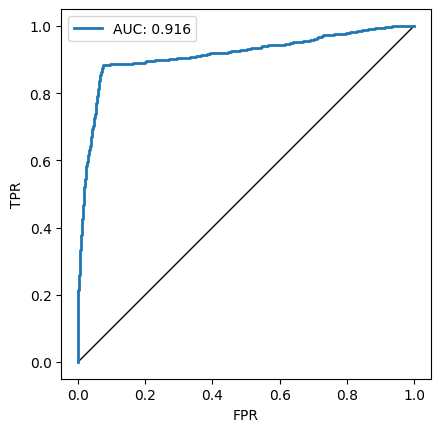

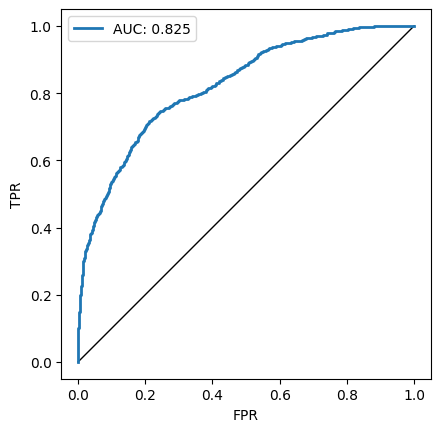

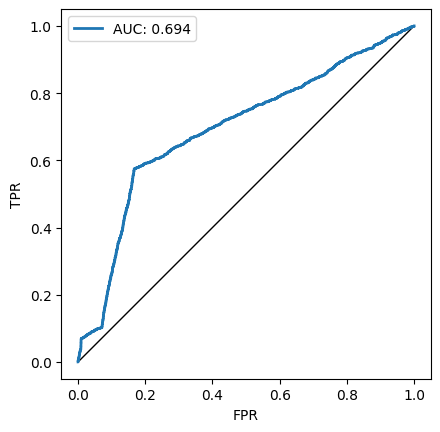

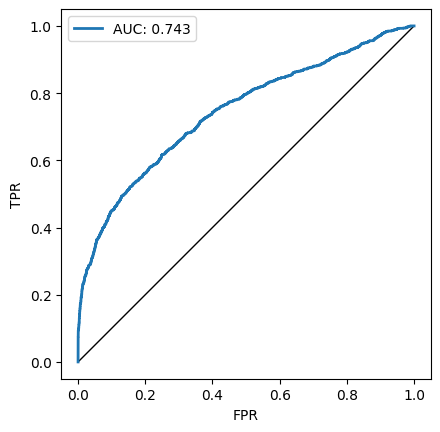

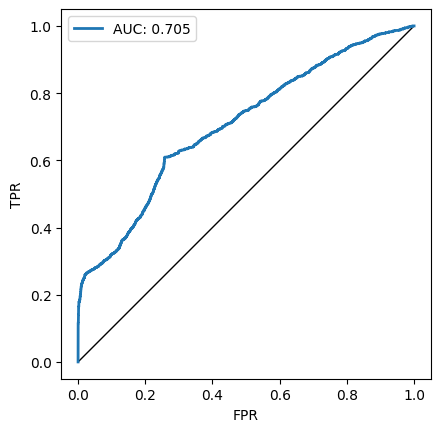

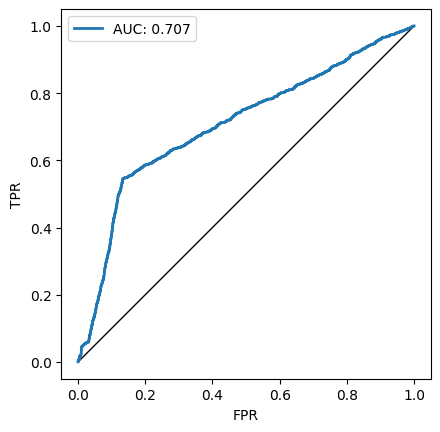

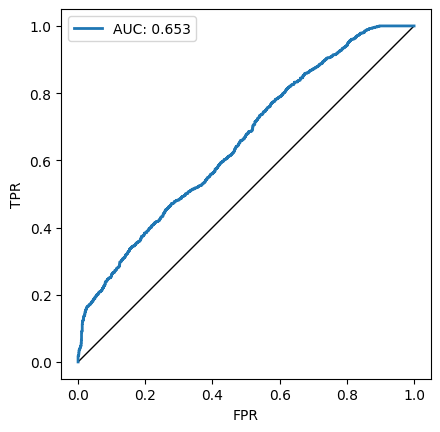

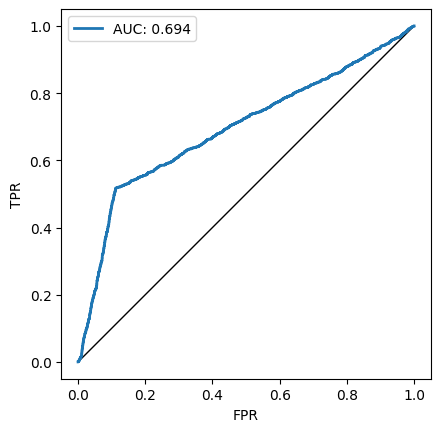

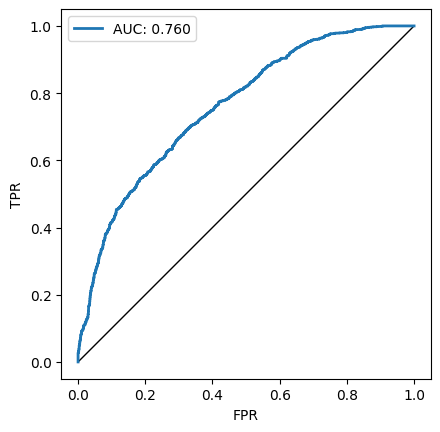

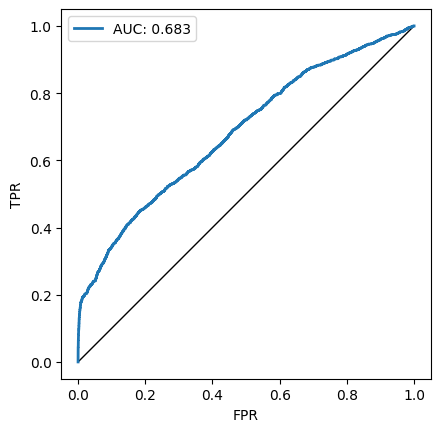

In [4]:
from services.eval_privacy import compute_mia_attacks

attacks_results_list = []
figure_list = []
for model in models:
    attacks_result, figure = compute_mia_attacks(model, X_train_seq_datasets_original[0], X_test_seq, y_train_seq_datasets_original[0], y_test_seq)
    attacks_results_list.append(attacks_result)
    figure_list.append(figure)

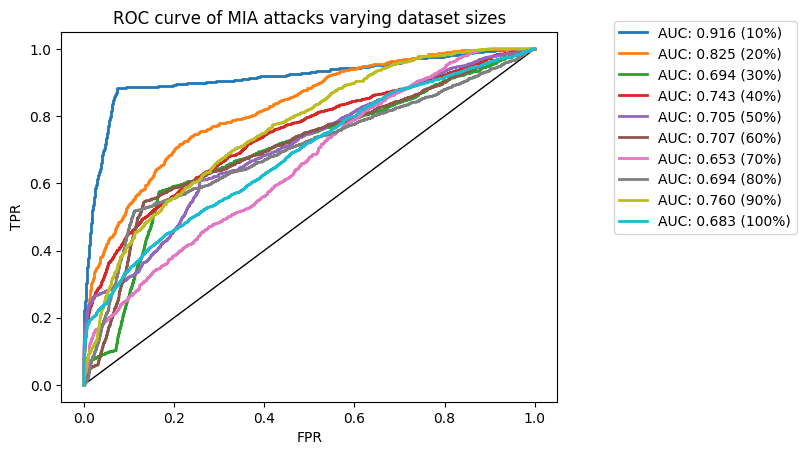

In [11]:
import matplotlib.pyplot as plt
from sklearn import metrics

attacks_results_list[0].get_result_with_max_auc().roc_curve.fpr

fig = plt.figure()
plt.plot([0, 1], [0, 1], 'k', lw=1.0)

for i, attacks_result in enumerate(attacks_results_list):
    x = attacks_result.get_result_with_max_auc().roc_curve.fpr
    y = attacks_result.get_result_with_max_auc().roc_curve.tpr
    plt.plot(x, y, lw=2, label=f'AUC: {metrics.auc(x, y):.3f} ({i+1}0%)')
plt.title('ROC curve of MIA attacks varying dataset sizes')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.show()

In [6]:
from sklearn.metrics import classification_report

classification_reports = []
for model, X_train_seq, y_train_seq in zip(models, X_train_seq_datasets, y_train_seq_datasets):
    y_pred = model.predict(X_test_seq)
    cr = classification_report(y_test_seq, y_pred > 0.5, output_dict=True)
    classification_reports.append(cr)

2380/2380 [==============================] - 12s 5ms/step


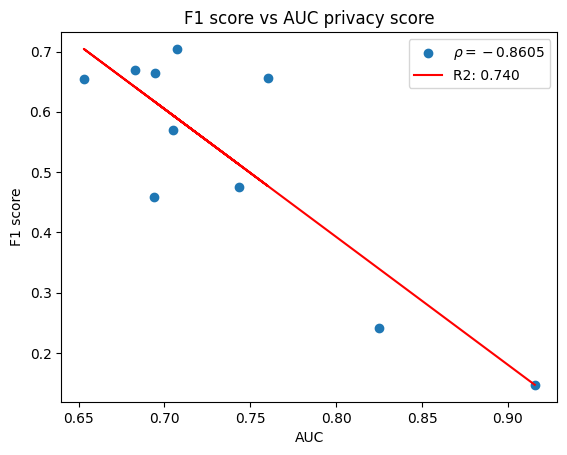

In [10]:
from sklearn.linear_model import LinearRegression
import numpy as np

aucs = []
f1_scores = []
recalls = []
precisions = []
for cr, attacks_result in zip(classification_reports, attacks_results_list):
    x = attacks_result.get_result_with_max_auc().roc_curve.fpr
    y = attacks_result.get_result_with_max_auc().roc_curve.tpr
    auc = metrics.auc(x, y)
    f1_score = cr['1']['f1-score']
    recall = cr['1']['recall']
    precision = cr['1']['precision']

    aucs.append(auc)
    f1_scores.append(f1_score)
    recalls.append(recall)
    precisions.append(precision)

aucs = np.array(aucs).reshape(-1, 1)
linear_model = LinearRegression()
linear_model.fit(aucs, f1_scores)

rho = np.corrcoef(aucs.flatten(), f1_scores)[0, 1]
r2 = linear_model.score(aucs, f1_scores)

fig = plt.figure()
plt.title('F1 score vs AUC privacy score')
plt.scatter(aucs, f1_scores)
plt.plot(aucs, linear_model.predict(aucs), color='red')
plt.legend([fr'$\rho = {rho:.4f}$', f'R2: {r2:.3f}'])
plt.xlabel('AUC')
plt.ylabel('F1 score')
plt.show()